###  Kaggle Link

https://www.kaggle.com/c/kkbox-music-recommendation-challenge

### Tables

#### train.csv

- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
- source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
- target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

#### test.csv

- id: row id (will be used for submission)
- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
- source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.

#### songs.csv

The songs. Note that data is in unicode.

- song_id
- song_length: in ms
- genre_ids: genre category. Some songs have multiple genres and they are separated by |
- artist_name
- composer
- lyricist
- language

#### members.csv

User information.

- msno
- city
- bd: age. Note: this column has outlier values, please use your judgement.
- gender
- registered_via: registration method
- registration_init_time: format %Y%m%d
- expiration_date: format %Y%m%d

#### song_extra_info.csv

- song_id
- song name: the name of the song.
- isrc: International Standard Recording Code, theoretically can be used as an identity of a song. However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.

### Reading Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time
import gc

from datetime import datetime

sns.set(style='whitegrid')

pd.set_option('display.max_columns', None)  

%matplotlib inline

In [2]:
df_test = pd.read_csv('../Data/Kaggle/MusicRecomendation/test.csv', dtype={'msno' : 'category',
                                                                           'source_system_tab' : 'category',
                                                                           'source_screen_name' : 'category',
                                                                           'source_type' : 'category',
                                                                           'song_id' : 'category'})

df_train = pd.read_csv('../Data/Kaggle/MusicRecomendation/train.csv', dtype={'msno' : 'category',
                                                                             'source_system_tab' : 'category',
                                                                             'source_screen_name' : 'category',
                                                                             'source_type' : 'category',
                                                                             'target' : np.uint8,
                                                                             'song_id' : 'category'})

df_members = pd.read_csv('../Data/Kaggle/MusicRecomendation/members.csv', dtype={'city' : 'category',
                                                                                 'bd' : np.uint8,
                                                                                 'gender' : 'category',
                                                                                 'registered_via' : 'category'},
                         parse_dates=['registration_init_time', 'expiration_date'])

In [3]:
df_songs = pd.read_csv('../Data/Kaggle/MusicRecomendation/songs.csv', dtype={'genre_ids': 'category',
                                                                             'language' : 'category',
                                                                             'artist_name' : 'category',
                                                                             'composer' : 'category',
                                                                             'lyricist' : 'category',
                                                                             'song_id' : 'category'})

In [8]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [9]:
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [10]:
df_songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [11]:
df_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


### Merging

In [4]:
df_train = df_train.merge(df_members, how='left', on='msno')
df_train = df_train.merge(df_songs, how='left', on='song_id')
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,2012-01-02,2017-10-05,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,2011-05-25,2017-09-11,284584.0,1259,Various Artists,NaN,NaN,52.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,2011-05-25,2017-09-11,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,2011-05-25,2017-09-11,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,2012-01-02,2017-10-05,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0


In [5]:
df_test = df_test.merge(df_members, how='left', on='msno')
df_test = df_test.merge(df_songs, how='left', on='song_id')
df_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,1,0,NaN,7,2016-02-19,2017-09-18,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,1,0,NaN,7,2016-02-19,2017-09-18,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,1,0,NaN,4,2016-11-17,2016-11-24,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,3,30,male,9,2007-07-25,2017-04-30,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,3,30,male,9,2007-07-25,2017-04-30,197590.0,873,Yoga Mr Sound,Neuromancer,NaN,-1.0


In [6]:
del df_members
del df_songs

gc.collect()

446

### Feature Engineering

In [7]:
def genre_id_count(x):
    if x == 'no_genre_id':
        return 0
    else:
        return x.count('|') + 1

In [8]:
def lyricist_count(x):
    if x == 'no_lyricist':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1
    return sum(map(x.count, ['|', '/', '\\', ';']))

In [9]:
def composer_count(x):
    if x == 'no_composer':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1

In [10]:
def is_featured(x):
    if 'feat' in str(x) :
        return 1
    return 0

In [11]:
def artist_count(x):
    if x == 'no_artist':
        return 0
    else:
        return x.count('and') + x.count(',') + x.count('feat') + x.count('&')

In [12]:
_dict_count_song_played_train = {k: v for k, v in df_train['song_id'].value_counts().iteritems()}
_dict_count_song_played_test  = {k: v for k, v in  df_test['song_id'].value_counts().iteritems()}
def count_song_played(x):
    try:
        return _dict_count_song_played_train[x]
    except KeyError:
        try:
            return _dict_count_song_played_test[x]
        except KeyError:
            return 0

In [13]:
_dict_count_artist_played_train = {k: v for k, v in df_train['artist_name'].value_counts().iteritems()}
_dict_count_artist_played_test =  {k: v for k, v in  df_test['artist_name'].value_counts().iteritems()}
def count_artist_played(x):
    try:
        return _dict_count_artist_played_train[x]
    except KeyError:
        try:
            return _dict_count_artist_played_test[x]
        except KeyError:
            return 0

In [14]:
for df in [df_train, df_test]:
    df['genre_ids'] = df['genre_ids'].cat.add_categories(['no_genre_id'])
    df['genre_ids'].fillna('no_genre_id', inplace=True)
    df['genre_ids_count'] = df['genre_ids'].apply(genre_id_count).astype(np.int8)
    
    df['lyricist'] = df['lyricist'].cat.add_categories(['no_lyricist'])
    df['lyricist'].fillna('no_lyricist', inplace=True)
    df['lyricists_count'] = df['lyricist'].apply(lyricist_count).astype(np.int8)
    
    df['composer'] = df['composer'].cat.add_categories(['no_composer'])
    df['composer'].fillna('no_composer', inplace=True)
    df['composer_count'] = df['composer'].apply(composer_count).astype(np.int8)
    
    df['artist_name'] = df['artist_name'].cat.add_categories(['no_artist'])
    df['artist_name'].fillna('no_artist', inplace=True)
    df['is_featured'] = df['artist_name'].apply(is_featured).astype('category')
    df['artist_count'] = df['artist_name'].apply(artist_count).astype(np.int8)
    
    df['count_song_played'] = df['song_id'].apply(count_song_played).astype(np.int64)
    df['count_artist_played'] = df['artist_name'].apply(count_artist_played).astype(np.int64)

In [15]:
df_train['registration_duration'] = (df_train['expiration_date'] - df_train['registration_init_time']).dt.days
df_test['registration_duration']  = (df_test['expiration_date'] - df_test['registration_init_time']).dt.days

In [16]:
for df in [df_train, df_test]:
    df.drop(['expiration_date', 'registration_init_time',
             'genre_ids', 'artist_name', 'composer', 'lyricist'], axis=1, inplace=True)

In [17]:
df_train.shape

(7377418, 20)

In [18]:
df_test.shape

(2556790, 20)

### Exploratory Analysis

In [17]:
df_train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'song_length', 'language', 'genre_ids_count', 'lyricists_count',
       'composer_count', 'is_featured', 'artist_count',
       'registration_duration'],
      dtype='object')

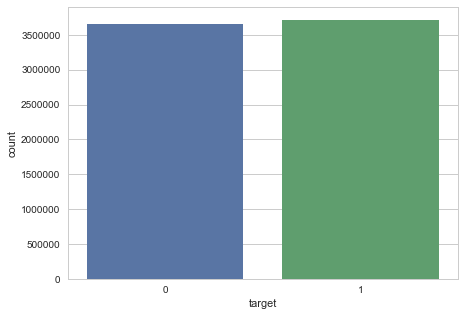

In [18]:
plt.figure(figsize=(7, 5))
sns.countplot(df_train['target'])

Huum, balanced. 

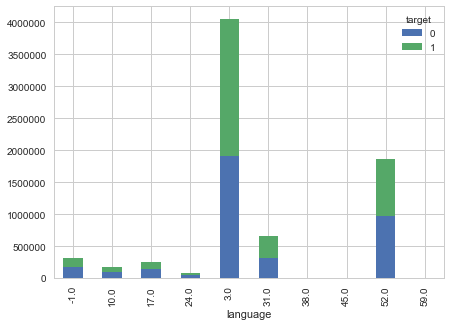

In [19]:
crosstab = pd.crosstab(df_train['language'], df_train['target'])
crosstab.plot(kind='bar', stacked=True, grid=True, figsize=(7, 5))

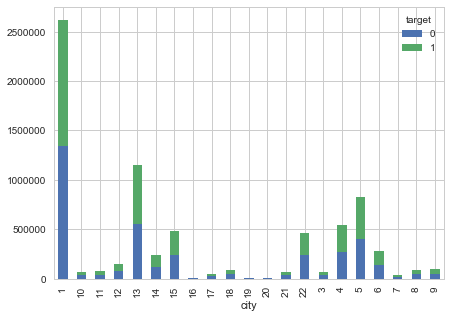

In [20]:
crosstab = pd.crosstab(df_train['city'], df_train['target'])
crosstab.plot(kind='bar', stacked=True, grid=True, figsize=(7, 5))

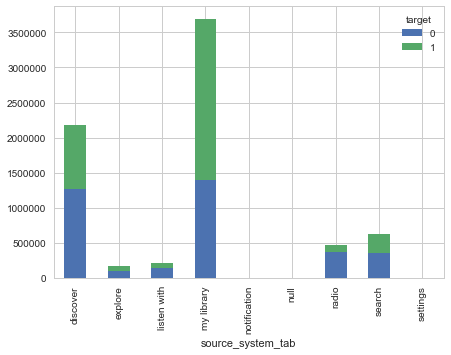

In [21]:
crosstab = pd.crosstab(df_train['source_system_tab'], df_train['target'])
crosstab.plot(kind='bar', stacked=True, grid=True, figsize=(7, 5))

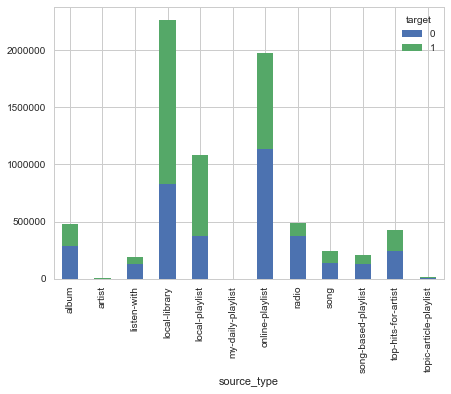

In [22]:
crosstab = pd.crosstab(df_train['source_type'], df_train['target'])
crosstab.plot(kind='bar', stacked=True, grid=True, figsize=(7, 5))

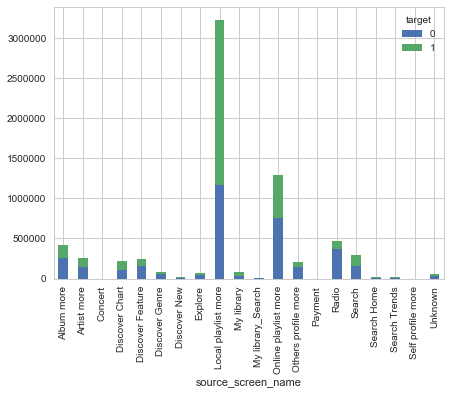

In [23]:
crosstab = pd.crosstab(df_train['source_screen_name'], df_train['target'])
crosstab.plot(kind='bar', stacked=True, grid=True, figsize=(7, 5))

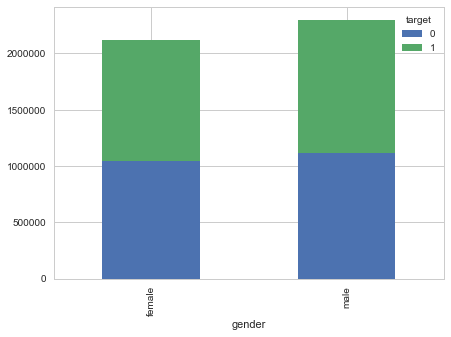

In [24]:
crosstab = pd.crosstab(df_train['gender'], df_train['target'])
crosstab.plot(kind='bar', stacked=True, grid=True, figsize=(7, 5))

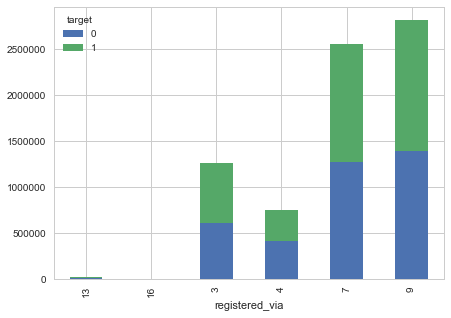

In [29]:
crosstab = pd.crosstab(df_train['registered_via'], df_train['target'])
crosstab.plot(kind='bar', stacked=True, grid=True, figsize=(7, 5))

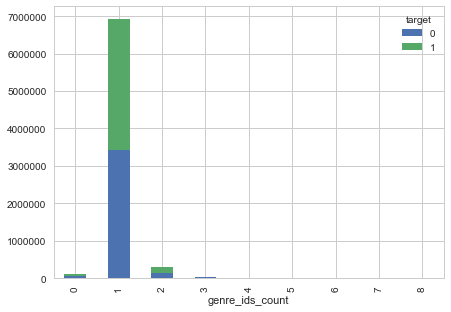

In [25]:
crosstab = pd.crosstab(df_train['genre_ids_count'], df_train['target'])
crosstab.plot(kind='bar', stacked=True, grid=True, figsize=(7, 5))

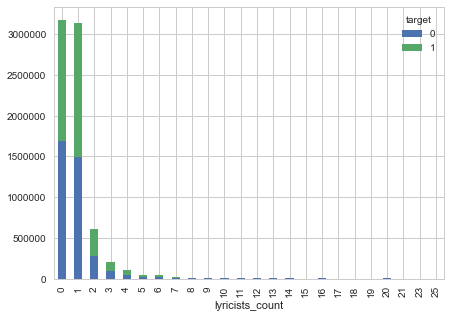

In [26]:
crosstab = pd.crosstab(df_train['lyricists_count'], df_train['target'])
crosstab.plot(kind='bar', stacked=True, grid=True, figsize=(7, 5))

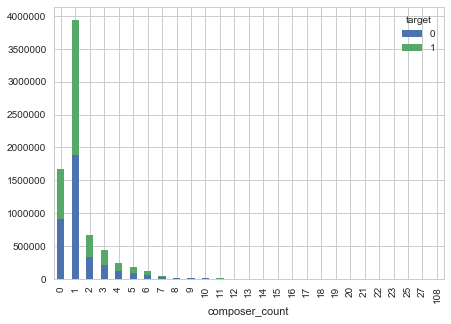

In [27]:
crosstab = pd.crosstab(df_train['composer_count'], df_train['target'])
crosstab.plot(kind='bar', stacked=True, grid=True, figsize=(7, 5))

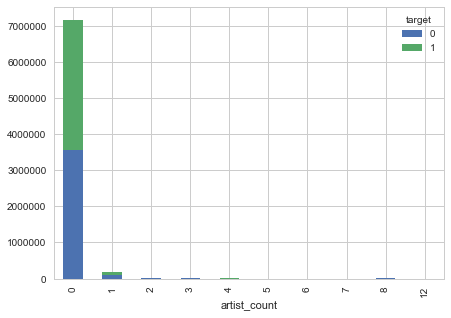

In [28]:
crosstab = pd.crosstab(df_train['artist_count'], df_train['target'])
crosstab.plot(kind='bar', stacked=True, grid=True, figsize=(7, 5))

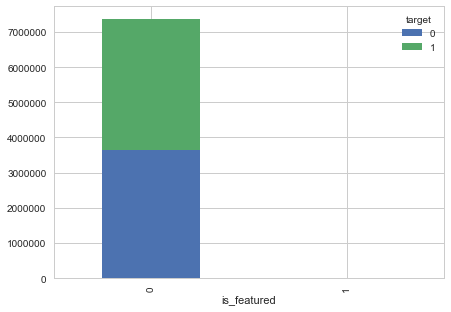

In [29]:
crosstab = pd.crosstab(df_train['is_featured'], df_train['target'])
crosstab.plot(kind='bar', stacked=True, grid=True, figsize=(7, 5))

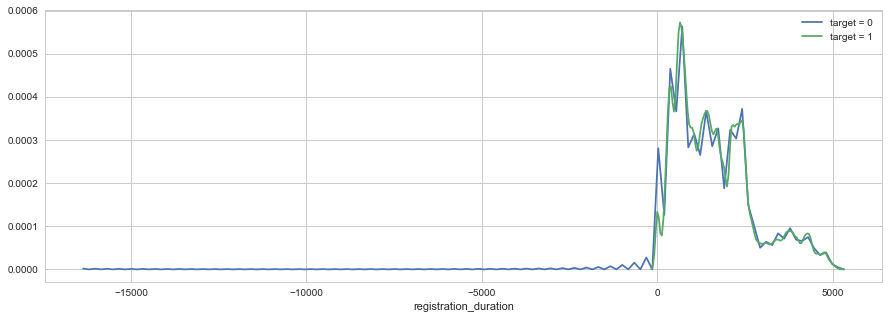

In [32]:
plt.figure(figsize=(15, 5))
sns.distplot(df_train[df_train['target'] == 0]['registration_duration'].fillna(0).astype(int), hist=False, label='target = 0')
sns.distplot(df_train[df_train['target'] == 1]['registration_duration'].fillna(0).astype(int), hist=False, label='target = 1')

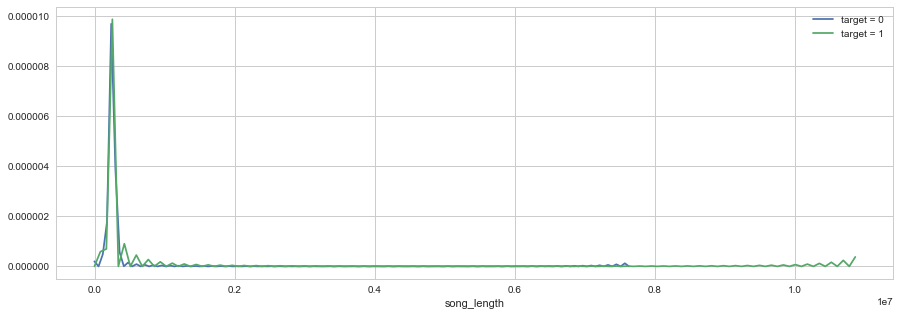

In [33]:
plt.figure(figsize=(15, 5))
sns.distplot(df_train[df_train['target'] == 0]['song_length'].fillna(0).astype(int), hist=False, label='target = 0')
sns.distplot(df_train[df_train['target'] == 1]['song_length'].fillna(0).astype(int), hist=False, label='target = 1')

### Data Preparation

#### Types

In [19]:
df_ids = df_test['id']
df_test.drop(['id'], axis=1, inplace=True)

In [20]:
df_train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'city', 'bd', 'gender', 'registered_via',
       'song_length', 'language', 'genre_ids_count', 'lyricists_count',
       'composer_count', 'is_featured', 'artist_count', 'count_song_played',
       'count_artist_played', 'registration_duration'],
      dtype='object')

In [21]:
df_test.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'city', 'bd', 'gender', 'registered_via', 'song_length',
       'language', 'genre_ids_count', 'lyricists_count', 'composer_count',
       'is_featured', 'artist_count', 'count_song_played',
       'count_artist_played', 'registration_duration'],
      dtype='object')

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
msno                     object
song_id                  object
source_system_tab        category
source_screen_name       category
source_type              category
target                   uint8
city                     category
bd                       uint8
gender                   category
registered_via           category
song_length              float64
language                 category
genre_ids_count          int8
lyricists_count          int8
composer_count           int8
is_featured              category
artist_count             int8
count_song_played        int64
count_artist_played      int64
registration_duration    int64
dtypes: category(8), float64(1), int64(3), int8(4), object(2), uint8(2)
memory usage: 812.5+ MB


In [23]:
for df in [df_train, df_test]:
    df['song_id'] = df['song_id'].astype('category')
    df['msno'] = df['msno'].astype('category')

#### Missing Values

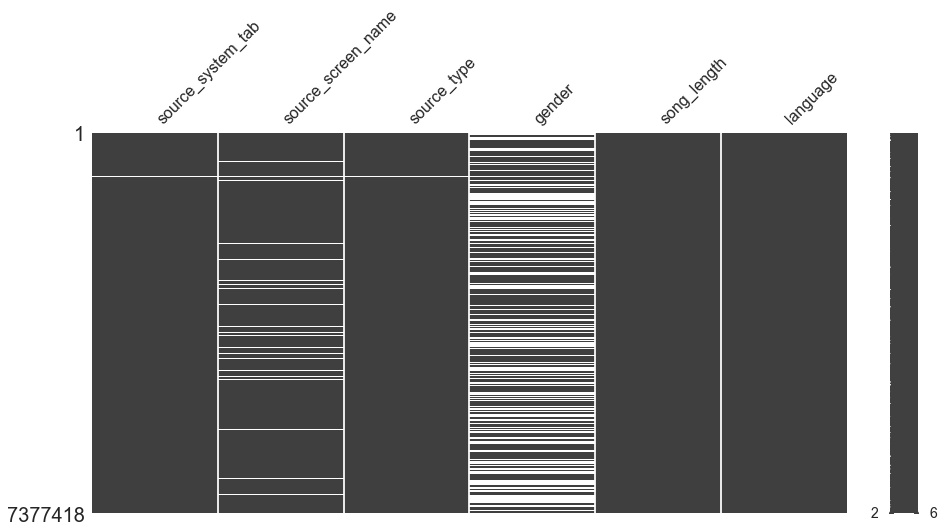

In [39]:
import missingno as msno

missing_columns = df_train.columns[df_train.isnull().any()].tolist()
msno.matrix(df_train[missing_columns], figsize=(15, 7))

In [24]:
categorical =  df_train.select_dtypes(['category']).columns
list(categorical)

['msno',
 'song_id',
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'city',
 'gender',
 'registered_via',
 'language',
 'is_featured']

In [25]:
for df in [df_train, df_test]:
    for col in categorical:
        df[col] = df[col].cat.add_categories(['NaN']).fillna('NaN')

In [26]:
for df in [df_train, df_test]:
    df['song_length'] = df['song_length'].fillna(df['song_length'].mean())

#### Categorical Features

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
df_both = pd.concat([df_train, df_test])

In [29]:
le = LabelEncoder()

for cat in categorical:
    print(cat)
    le = le.fit(df_both[cat])
    for df in [df_train, df_test]:
        df[cat] = le.transform(df[cat])
    print(le.classes_)
    print(le.transform(le.classes_))

msno
['++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU='
 '++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg='
 '++TMf3Z81LFn6nXHm753GvkF2DhAgQwRV5zn0yQsX40=' ...,
 'zzompfSaMamqvjyCMYvgUBwYrxh8fHE40z3f73CQoak='
 'zzqc2ja7z10FtSpagYVcAZXg/gPRq7wcDZuNFj+zJSU='
 'zzzRi5ek1YCKTGns8C77xwAutE05PAPmz8T/pIIQhzE=']
[    0     1     2 ..., 34400 34401 34402]
song_id
['+++2AEoM0d8iZTdbnAjUm35bnGKGMXdZJSv4rrWK6JQ='
 '++/ACCkEN/+VtgrJxEqeRgRmV4y8pcarDJ9T/yRAi1E='
 '++/lJNswCU+za2pYB0cWIbGL5UzWIKtfweX20+GImZA=' ...,
 'zzxGtSW9L/V3sRNKZbkOgziHtftZ9/oNvETOTY/QHr8='
 'zzz959t0MJ0RUBxk+ihNjK/w8NQiiXnEhwGLuSapgqw='
 'zzzkIR9d2ggpCr5ofvGZu0JFdjScoIxMgcV3dR4yKh0=']
[     0      1      2 ..., 419836 419837 419838]
source_system_tab
['NaN' 'discover' 'explore' 'listen with' 'my library' 'notification'
 'null' 'radio' 'search' 'settings']
[0 1 2 3 4 5 6 7 8 9]
source_screen_name
['Album more' 'Artist more' 'Concert' 'Discover Chart' 'Discover Feature'
 'Discover Genre' 'Discover New' 'Explore' 'Local playlist more'
 '

In [30]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,song_length,language,genre_ids_count,lyricists_count,composer_count,is_featured,artist_count,count_song_played,count_artist_played,registration_duration
0,9176,86884,2,7,7,1,0,0,0,4,206471.0,8,1,0,2,0,0,215,1140,2103
1,19273,260594,4,8,5,1,4,24,1,5,284584.0,8,1,0,0,0,0,1,303616,2301
2,19273,140755,4,8,5,1,4,24,1,5,225396.0,8,1,0,1,0,0,4,289,2301
3,19273,27577,4,8,5,1,4,24,1,5,255512.0,0,1,0,1,0,0,1,1,2301
4,9176,38706,2,7,7,1,0,0,0,4,187802.0,8,1,0,3,0,0,412,427,2103


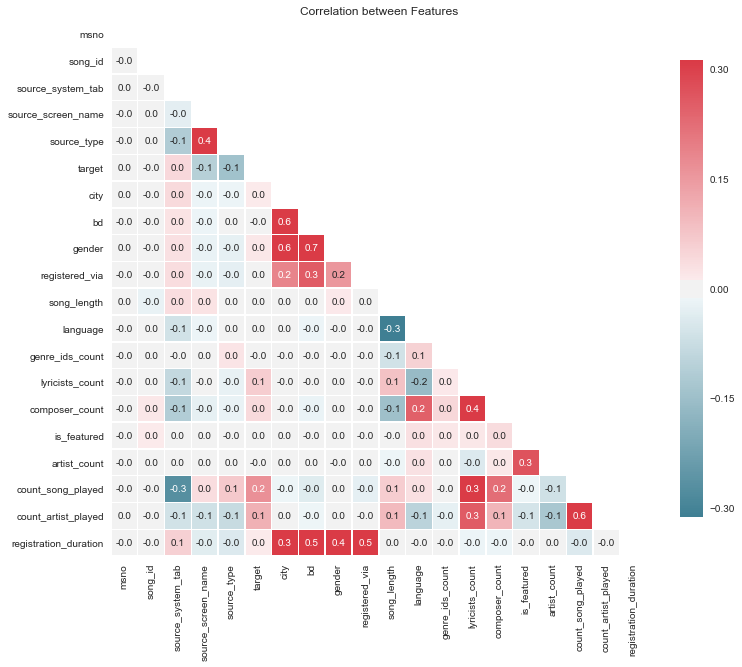

In [34]:
corr = df_train.corr('spearman')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 12))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, 
            cbar_kws={"shrink": .7}, annot=True, annot_kws={"size": 10}, fmt='.1f')
plt.title('Correlation between Features')

In [31]:
for cat in categorical:
    for df in [df_train, df_test]:
        df[cat] = df[cat].astype('category')

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
msno                     category
song_id                  category
source_system_tab        category
source_screen_name       category
source_type              category
target                   uint8
city                     category
bd                       uint8
gender                   category
registered_via           category
song_length              float64
language                 category
genre_ids_count          int8
lyricists_count          int8
composer_count           int8
is_featured              category
artist_count             int8
count_song_played        int64
count_artist_played      int64
registration_duration    int64
dtypes: category(10), float64(1), int64(3), int8(4), uint8(2)
memory usage: 756.4 MB


### Train, Test & Sample

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train = df_train.drop(['target'], axis=1).copy()
y_train = df_train['target'].copy()
X_valid = df_test.copy()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train.copy(), y_train.copy(), test_size=0.2, random_state=0)

In [36]:
X_train.shape

(5901934, 19)

In [37]:
del df_train
del df_test
del df_both

In [38]:
gc.collect()

390

### Modeling

In [39]:
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [41]:
from sklearn.metrics import roc_auc_score

def chosing_lift(clf, X_test, y_test):
    for l in np.linspace(0.1, 0.9, 9):     
        y_pred = clf.predict_proba(X_test)[:, 1]
        y_pred = np.where(y_pred >= l, 1, 0)
        roc_auc = roc_auc_score(y_test, y_pred)
        print(roc_auc)

In [42]:
def plot_importances(clf, features, top=None):
    importances = clf.feature_importances_[:top]
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(15, 5))
    plt.title("Feature importance")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), features[indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.show()

#### LightGBM

In [47]:
list(categorical)

['msno',
 'song_id',
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'city',
 'gender',
 'registered_via',
 'language',
 'is_featured']

In [48]:
idx = np.random.choice(np.arange(len(y_train)), round(len(y_train)*0.02), replace=False)
X_sample = X_train.iloc[idx].copy()
y_sample = y_train.iloc[idx].copy()

In [49]:
X_sample.shape

(118039, 19)

In [50]:
import lightgbm as lgb

In [51]:
clf_lgbm = lgb.LGBMClassifier(random_state=0)
model_params = {
    'learning_rate':        [0.03, 0.05, 0.08],
    'num_leaves':           [60, 70, 80],
    'min_data_in_leaf':     [5, 7, 10],
    'max_depth':            [-1, 5, 7, 10],
    'bagging_fraction':     [0.7, 0.9, 1.0],
    'bagging_freq':         [1, 3, 5],
    'min_data_in_bin':      [2, 3, 5],
    'feature_fraction':     [0.3, 0.5, 0.7],
    'max_bin':              [40, 50, 60, 70]
}

grid = RandomizedSearchCV(clf_lgbm, model_params, cv=3, verbose=1, scoring='roc_auc', n_jobs=-1, n_iter=1200)
grid.fit(X_sample, y_sample)

print (grid.best_params_)
print (grid.best_score_)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 51.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 75.7min finished


{'num_leaves': 60, 'min_data_in_leaf': 5, 'min_data_in_bin': 3, 'max_depth': 7, 'max_bin': 50, 'learning_rate': 0.03, 'feature_fraction': 0.7, 'bagging_freq': 3, 'bagging_fraction': 1.0}
0.695673456952


In [52]:
clf_lgbm = grid.best_estimator_.fit(X_train, y_train)

In [53]:
scores = cross_val_score(clf_lgbm, X_test, y_test, cv=3, n_jobs=-1, scoring='roc_auc')
print("ROC AUC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ROC AUC: 0.72 (+/- 0.00)


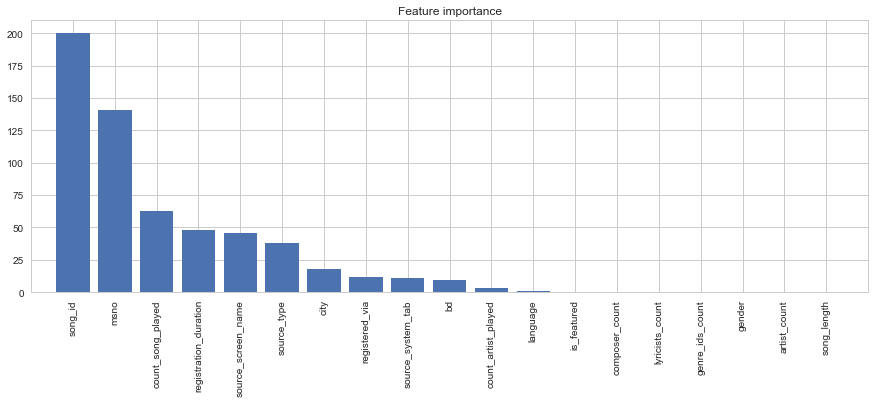

In [54]:
plot_importances(clf_lgbm, X_sample.columns)

In [55]:
y_pred = clf_lgbm.predict_proba(X_valid)

In [56]:
submission = pd.DataFrame.from_items([('id', df_ids), ('target', y_pred[:, 1])])
submission.to_csv('clf_lgbm_RecOutput.csv', index=False)

In [57]:
joblib.dump(clf_lgbm, '../clf_lgbm_Rec.pkl') 

['../clf_lgbm_Rec.pkl']

#### Deep Learning

In [43]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Activation, Embedding, concatenate
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import optimizers
from keras.callbacks import Callback, EarlyStopping
import keras.backend as K

Using TensorFlow backend.


In [44]:
import tensorflow as tf

def tf_roc_auc(y_true, y_pred):
    score, up_opt = tf.metrics.auc(y_true, y_pred)
    K.get_session().run(tf.local_variables_initializer())
    with tf.control_dependencies([up_opt]):
        score = tf.identity(score)
    return score

In [45]:
from IPython.display import clear_output

class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.tf_roc_acu = []
        self.val_tf_roc_auc = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.tf_roc_acu.append(logs.get('tf_roc_acu'))
        self.val_tf_roc_auc.append(logs.get('val_tf_roc_auc'))
        self.i += 1
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.plot(self.x, self.losses, label='loss')
        plt.plot(self.x, self.val_losses, label='val_loss')
        plt.plot(self.x, self.tf_roc_acu, label='tf_roc_acu')
        plt.plot(self.x, self.val_tf_roc_auc, label='val_tf_roc_auc')
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [46]:
train_objs_num = len(X_train)
test_objs_num = len(X_test)

dataset = pd.concat(objs=[X_train, X_test, X_valid], axis=0).copy()   

In [47]:
X_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,song_length,language,genre_ids_count,lyricists_count,composer_count,is_featured,artist_count,count_song_played,count_artist_played,registration_duration
3843411,6286,191125,4,8,4,14,51,2,5,220682.0,5,1,1,3,0,0,109,8188,3991
2864534,24682,404236,4,8,4,0,0,0,4,308636.0,4,1,2,1,0,0,756,11748,1376
1104647,25342,19429,8,18,9,0,0,0,3,217153.0,4,1,0,1,0,0,1,4829,3
7110713,12310,155629,1,4,10,6,28,1,5,260388.0,4,1,0,0,0,0,1217,25521,2527
3431457,12801,270012,1,12,10,4,36,1,5,263616.0,1,1,1,1,0,0,44,3314,2520


In [48]:
categorical

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'city', 'gender', 'registered_via', 'language',
       'is_featured'],
      dtype='object')

In [49]:
from sklearn.preprocessing import StandardScaler

non_categorical_feat = [c for c in dataset.columns if c not in categorical]

scaler = StandardScaler()
dataset.fillna(0, inplace=True)
dataset.loc[:, non_categorical_feat] = scaler.fit_transform(dataset[non_categorical_feat])

In [50]:
dataset.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,song_length,language,genre_ids_count,lyricists_count,composer_count,is_featured,artist_count,count_song_played,count_artist_played,registration_duration
3843411,6286,191125,4,8,4,14,2.129101,2,5,-0.349716,5,-0.128529,0.127361,1.003036,0,-0.163327,-0.577656,-0.441387,2.091691
2864534,24682,404236,4,8,4,0,-1.091983,0,4,0.926048,4,-0.128529,0.955355,-0.238962,0,-0.163327,-0.314598,-0.392028,-0.215530
1104647,25342,19429,8,18,9,0,-1.091983,0,3,-0.400904,4,-0.128529,-0.700632,-0.238962,0,-0.163327,-0.621567,-0.487960,-1.426932
7110713,12310,155629,1,4,10,6,0.676456,1,5,0.226216,4,-0.128529,-0.700632,-0.859961,0,-0.163327,-0.127164,-0.201066,0.800000
3431457,12801,270012,1,12,10,4,1.181724,1,5,0.273037,1,-0.128529,0.127361,-0.238962,0,-0.163327,-0.604084,-0.508965,0.793824


In [51]:
dataset.shape

(9934208, 19)

In [52]:
import category_encoders as ce

In [53]:
to_encode = list([cat for cat in categorical if cat not in ['msno', 'song_id']])
to_encode

['source_system_tab',
 'source_screen_name',
 'source_type',
 'city',
 'gender',
 'registered_via',
 'language',
 'is_featured']

In [54]:
encoder = ce.BinaryEncoder(cols=list(to_encode))

In [55]:
dataset = encoder.fit_transform(dataset, None)

In [56]:
dataset.head()

,source_system_tab_0,source_system_tab_1,source_system_tab_2,source_system_tab_3,source_screen_name_0,source_screen_name_1,source_screen_name_2,source_screen_name_3,source_screen_name_4,source_type_0,source_type_1,source_type_2,source_type_3,city_0,city_1,city_2,city_3,city_4,gender_0,gender_1,registered_via_0,registered_via_1,registered_via_2,language_0,language_1,language_2,language_3,is_featured_0,msno,song_id,bd,song_length,genre_ids_count,lyricists_count,composer_count,artist_count,count_song_played,count_artist_played,registration_duration
3843411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6286,191125,2.129101,-0.349716,-0.128529,0.127361,1.003036,-0.163327,-0.577656,-0.441387,2.091691
2864534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,24682,404236,-1.091983,0.926048,-0.128529,0.955355,-0.238962,-0.163327,-0.314598,-0.392028,-0.215530
1104647,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,25342,19429,-1.091983,-0.400904,-0.128529,-0.700632,-0.238962,-0.163327,-0.621567,-0.487960,-1.426932
7110713,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,12310,155629,0.676456,0.226216,-0.128529,-0.700632,-0.859961,-0.163327,-0.127164,-0.201066,0.800000
3431457,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,12801,270012,1.181724,0.273037,-0.128529,0.127361,-0.238962,-0.163327,-0.604084,-0.508965,0.793824


In [57]:
dataset.shape

(9934208, 39)

##### Embeddings

In [73]:
X_train = dataset[:train_objs_num].copy()
X_test  = dataset[train_objs_num:train_objs_num+test_objs_num].copy()
X_valid = dataset[train_objs_num+test_objs_num:].copy()

In [59]:
MAX_MSNO = dataset['msno'].max() + 1
MAX_SONG_ID =  dataset['song_id'].max() + 1

In [60]:
print(MAX_MSNO) 
print(MAX_SONG_ID)

34403
419839


In [61]:
def get_keras_data(dataset):
    X = {
        # Categorical
        'msno' : np.array(dataset['msno']),
        'song_id' : np.array(dataset['song_id']),

        # Numerical
        'numerical' : np.array(dataset[dataset.columns.difference(['song_id', 'msno'])])
    }
    return X

X_train_ = get_keras_data(X_train)
X_test_  = get_keras_data(X_test)
X_valid_ = get_keras_data(X_valid)

In [62]:
X_train_

{'msno': array([ 6286, 24682, 25342, ...,  3972, 17852, 34268], dtype=int64),
 'numerical': array([[-0.16332657,  2.1291014 ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.16332657, -1.09198292,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.16332657, -1.09198292,  0.        , ...,  0.        ,
          0.        ,  1.        ],
        ..., 
        [-0.16332657,  0.73961405,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.16332657,  1.18172366,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.16332657,  0.42382147,  0.        , ...,  0.        ,
          1.        ,  1.        ]]),
 'song_id': array([191125, 404236,  19429, ..., 312443, 218044, 288518], dtype=int64)}

In [63]:
X_train_['numerical'].shape[1]

37

In [64]:
def get_model():
    dr_r = 0.45
    # Categorical
    msno = Input(shape=[1], name='msno')
    song_id = Input(shape=[1], name='song_id')
    
    # Numerical
    numerical = Input(shape=[X_train_['numerical'].shape[1]], name='numerical')

    
    # Embeddings layers
    emb_msno = Embedding(MAX_MSNO, 50) (msno)
    emb_song_id = Embedding(MAX_SONG_ID, 50) (song_id)
    
    # Main layer
    main_l = concatenate([
        Flatten() (emb_msno),
        Flatten() (emb_song_id),
        numerical
    ])
    
    main_l = Dropout(dr_r) (Dense(512, activation='relu') (main_l))
    main_l = Dropout(dr_r) (Dense(256, activation='relu') (main_l))
    main_l = Dropout(dr_r) (Dense(128, activation='relu') (main_l))
    main_l = Dropout(dr_r) (Dense(64, activation='relu') (main_l))
    
    # Output
    output = Dense(1, activation='sigmoid') (main_l)
    
    # Model
    model = Model([msno, song_id, numerical], output)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=[tf_roc_auc])
    
    return model

In [65]:
model = get_model()
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
msno (InputLayer)                (None, 1)             0                                            
____________________________________________________________________________________________________
song_id (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 1, 50)         1720150     msno[0][0]                       
____________________________________________________________________________________________________
embedding_2 (Embedding)          (None, 1, 50)         20991950    song_id[0][0]                    
___________________________________________________________________________________________

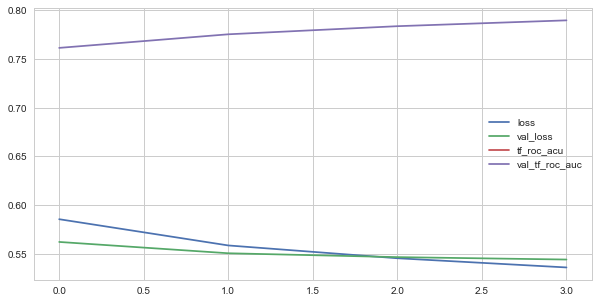

5901934/5901934 [==============================] - 340s - loss: 0.5361 - tf_roc_auc: 0.7871 - val_loss: 0.5442 - val_tf_roc_auc: 0.7897


In [66]:
early_stopping = EarlyStopping(monitor='tf_roc_auc', patience=2)
BATCH_SIZE = 1000
epochs = 5

model = get_model()
model.fit(X_train_, y_train, epochs=epochs, batch_size=BATCH_SIZE, validation_data=(X_test_, y_test), 
          verbose=1, callbacks=[plot_losses, early_stopping])

In [67]:
y_pred = model.predict(X_valid_)

In [68]:
submission = pd.DataFrame.from_items([('id', df_ids), ('target', y_pred.flatten())])
submission.to_csv('clf_dl_RecOutput.csv', index=False)

In [79]:
del model

##### Simple NN

In [74]:
X_train.drop(['msno', 'song_id'], axis=1, inplace=True)
X_test.drop(['msno', 'song_id'], axis=1, inplace=True)
X_valid.drop(['msno', 'song_id'], axis=1, inplace=True)
    
X_train.head()

,source_system_tab_0,source_system_tab_1,source_system_tab_2,source_system_tab_3,source_screen_name_0,source_screen_name_1,source_screen_name_2,source_screen_name_3,source_screen_name_4,source_type_0,source_type_1,source_type_2,source_type_3,city_0,city_1,city_2,city_3,city_4,gender_0,gender_1,registered_via_0,registered_via_1,registered_via_2,language_0,language_1,language_2,language_3,is_featured_0,bd,song_length,genre_ids_count,lyricists_count,composer_count,artist_count,count_song_played,count_artist_played,registration_duration
3843411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.129101,-0.349716,-0.128529,0.127361,1.003036,-0.163327,-0.577656,-0.441387,2.091691
2864534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,-1.091983,0.926048,-0.128529,0.955355,-0.238962,-0.163327,-0.314598,-0.392028,-0.215530
1104647,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,-1.091983,-0.400904,-0.128529,-0.700632,-0.238962,-0.163327,-0.621567,-0.487960,-1.426932
7110713,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0.676456,0.226216,-0.128529,-0.700632,-0.859961,-0.163327,-0.127164,-0.201066,0.800000
3431457,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1.181724,0.273037,-0.128529,0.127361,-0.238962,-0.163327,-0.604084,-0.508965,0.793824


In [80]:
model = Sequential()
model.add(Dense(24, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(8))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 24)                912       
_________________________________________________________________
batch_normalization_3 (Batch (None, 24)                96        
_________________________________________________________________
activation_3 (Activation)    (None, 24)                0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                400       
_________________________________________________________________
batch_normalization_4 (Batch (None, 16)                64        
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
__________

https://keras.io/getting-started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss

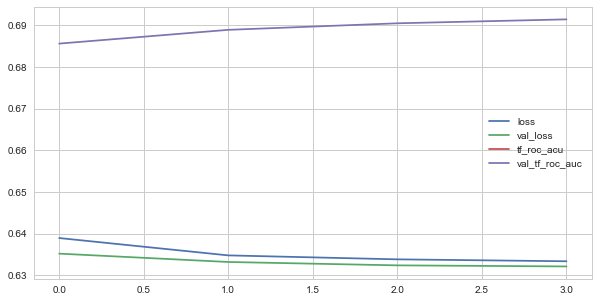

5901934/5901934 [==============================] - 82s - loss: 0.6334 - tf_roc_auc: 0.6910 - val_loss: 0.6321 - val_tf_roc_auc: 0.6914


In [81]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf_roc_auc])
hist = model.fit(X_train.values, y_train.values, batch_size=1000, epochs=10, verbose=1, 
                 validation_data=(X_test.values, y_test.values), callbacks=[plot_losses, early_stopping])

In [82]:
y_pred = model.predict(X_valid.values)

In [83]:
submission = pd.DataFrame.from_items([('id', df_ids), ('target', y_pred.flatten())])
submission.to_csv('clf_dl_RecOutput.csv', index=False)